## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn #necessary to create correlation matrix

# Tratamento (entrega 2)
> Developed in "**/data_treatment.ipynb**"

# Caracterização (Entrega 3)

In [8]:
df_cleaned = pd.read_excel('output/fluxo_escolar_2021_cleaned.xlsx',
                           engine='openpyxl',
                           index_col=[0])
df_cleaned.head()

,municipio,id_rede_ensino,id_escola,aprovado,reprovado,abandono
0,PIRAJU,1,34320,100.00,0.00,0.00
1,PIRAJU,1,34344,94.00,2.00,4.00
2,PIRAJU,1,34356,100.00,0.00,0.00
3,PIRAJU,1,34459,100.00,0.00,0.00
6,AMERICANA,1,17176,79.82,19.29,0.89


## Creating Standard bypass

In [9]:
std_reprovado = df_cleaned['reprovado'].std()
std_aprovado = df_cleaned['aprovado'].std()

print(f"Desvio padrão\nReprovado: { str(std_reprovado)} \nAprovado: {str(std_aprovado)}")

Desvio padrão
Reprovado: 3.9538715157081272 
Aprovado: 4.463648256286679


## Creating Central Tendency 

In [ ]:
mean = df_cleaned['reprovado'].mean() #media
median = df_cleaned['reprovado'].median() #mediana
quantile = df_cleaned['reprovado'].quantile()
mode = df_cleaned['reprovado'].mode().iloc[0]

print(f"Mode: { str(mode)} \nMedian: {str(median)} \nQuantile: {str(quantile)} \nMean: {str(mean)}")

Mode: 0.0 
Median: 0.0 
Quantile: 0.0 
Mean: 1.7952096128170896


### Creating a Correlation Matrix

/var/folders/gl/78hjm2sj5wd21cxl9_7qhrw00000gn/T/ipykernel_73453/3887670980.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_cleaned.corr()


<AxesSubplot: >

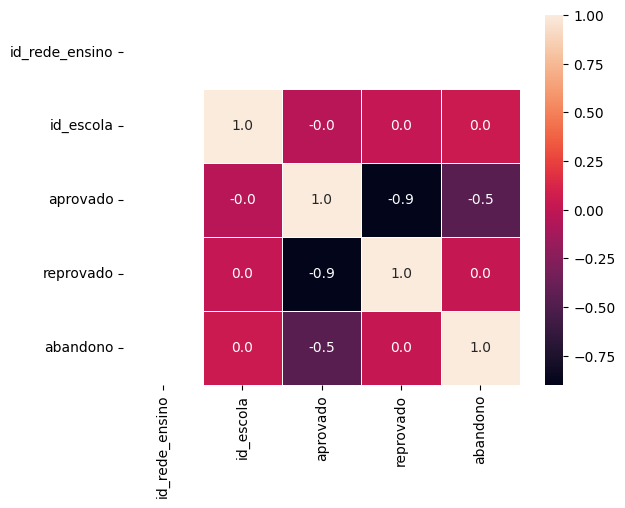

In [13]:
# correlation analysis
correlation = df_cleaned.corr()

# correlation matrix plot
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot